Certainly! The CRISP-DM (Cross-Industry Standard Process for Data Mining) is a comprehensive framework for guiding data mining projects. Let's walk through each of the steps in detail using the provided dataset:

### 1. Business Understanding:

This initial phase focuses on understanding the project's objectives and requirements from a business perspective. It involves:

- **Determine Business Objectives**: What problem are we trying to solve? For instance, are we trying to predict the sales of smartphones based on certain features, or perhaps categorize them based on user reviews?
  
- **Assess Situation**: This involves understanding the resources, constraints, assumptions, and other factors that need to be considered.
  
- **Determine Data Mining Goals**: This specifies the desired output of the project. For instance, it could be a predictive model or a clustering model.
  
- **Produce Project Plan**: Outline the steps to be taken during the data mining process, along with the initial assessment of tools and techniques.

For our case, let's assume our business objective is to "Categorize smartphones based on their specifications and price." The data mining goal would be to create a clustering model that segments smartphones into different categories.

### 2. Data Understanding:

This phase starts with an initial data collection and proceeds with activities to get familiar with the data, identify data quality problems, and discover first insights into the data.

**Let's start by loading the dataset and taking a preliminary look at its content.**

From the preliminary look at the dataset, we can observe the following columns:

1. **brand**: Brand of the smartphone.
2. **model**: Model name of the smartphone.
3. **colour**: Color variant of the smartphone.
4. **original_price**: Original price of the smartphone.
5. **discounted_price**: Discounted price of the smartphone.
6. **ratings**: Average rating of the smartphone.
7. **rating_count**: Number of ratings received.
8. **reviews**: Number of reviews.
9. **memory**: RAM size (in GB).
10. **storage**: Internal storage size (in GB).
11. **processor**: Processor type of the smartphone.
12. **rear_camera**: Specifications of the rear camera(s).
13. **front_camera**: Specifications of the front camera.
14. **display_size**: Display size (in inches).
15. **battery_capacity**: Battery capacity (in mAh).
16. **battery_type**: Type of battery used.

The next steps in the "Data Understanding" phase would be:

- **Describe Data**: Obtain a summary of the dataset, such as the number of missing values in each column, statistics of numerical columns, and unique values of categorical columns.
- **Explore Data**: Visualize the data to understand distributions, relationships, and patterns.
- **Verify Data Quality**: Identify any inconsistencies, anomalies, and missing values.

**Let's proceed with describing the data.**

Based on the description and missing values analysis, here's what we observe:

#### Dataset Description:
- The dataset consists of 836 records.
- There are 19 unique brands and 304 unique models.
- The original price of smartphones ranges from ₹4,899 to ₹1,59,900.
- The average rating across all smartphones is approximately 4.27.
- Memory (RAM) varies between 1 GB to 8 GB.
- Storage capacity varies from 8 GB to 512 GB.
- The dataset has details about 131 unique processors.
- The display size of smartphones ranges from 10.16 inches to 17.78 inches.
- The battery capacity varies from 1600 mAh to 7000 mAh.

#### Missing Values:
- **colour**: 5 missing values.
- **memory (RAM)**: 79 missing values.
- **storage**: 16 missing values.
- **processor**: 138 missing values.
- **front_camera**: 129 missing values.
- **battery_capacity**: 58 missing values.
- **battery_type**: 359 missing values.

With this understanding, the next logical step would be data exploration, where we visualize the data to better understand its distributions and patterns. However, since this process can be extensive and data-heavy, I'll focus on visualizing a few key aspects.

Would you like to proceed with visualizations, or shall we move to the next step of the CRISP-DM process?

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/flipkart_smartphones.csv')

# Display the first few rows of the dataset
data.head()

,brand,model,colour,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,processor,rear_camera,front_camera,display_size,battery_capacity,battery_type
0,VIVO,VIVO T1 44W,Starry Sky,19990,14499,4.5,87331,6044,4.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0,Lithium
1,APPLE,APPLE IPHONE 11,White,48900,47199,4.6,184191,10818,NaN,128.0,A Bionic Chip,12MP + 12MP,12MP,15.49,NaN,NaN
2,VIVO,VIVO T1 44W,Midnight Galaxy,20990,15999,4.4,51365,3750,6.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0,Lithium
3,XIAOMI,POCO M4 5G,Power Black,15999,11999,4.2,53448,4185,4.0,64.0,Mediatek Dimensity 700,50MP + 2MP,8MP,16.71,5000.0,Lithium Polymer
4,XIAOMI,REDMI 10,Caribbean Green,14999,9299,4.3,187787,12084,4.0,64.0,Qualcomm Snapdragon 680,50MP + 2MP,5MP,17.02,6000.0,Lithium Polymer


In [2]:
# Describe the data - including basic statistics and missing values
data_description = data.describe(include='all')
missing_values = data.isnull().sum()

data_description, missing_values

(         brand                  model colour  original_price  \
 count      836                    836    831      836.000000   
 unique      19                    304    375             NaN   
 top     XIAOMI  APPLE IPHONE 14 PLUS   Black             NaN   
 freq       179                     11     22             NaN   
 mean       NaN                    NaN    NaN    26112.848086   
 std        NaN                    NaN    NaN    23781.117479   
 min        NaN                    NaN    NaN     4899.000000   
 25%        NaN                    NaN    NaN    13999.000000   
 50%        NaN                    NaN    NaN    17999.000000   
 75%        NaN                    NaN    NaN    25999.000000   
 max        NaN                    NaN    NaN   159900.000000   
 
         discounted_price     ratings  rating_count        reviews      memory  \
 count         836.000000  836.000000  8.360000e+02     836.000000  757.000000   
 unique               NaN         NaN           NaN   

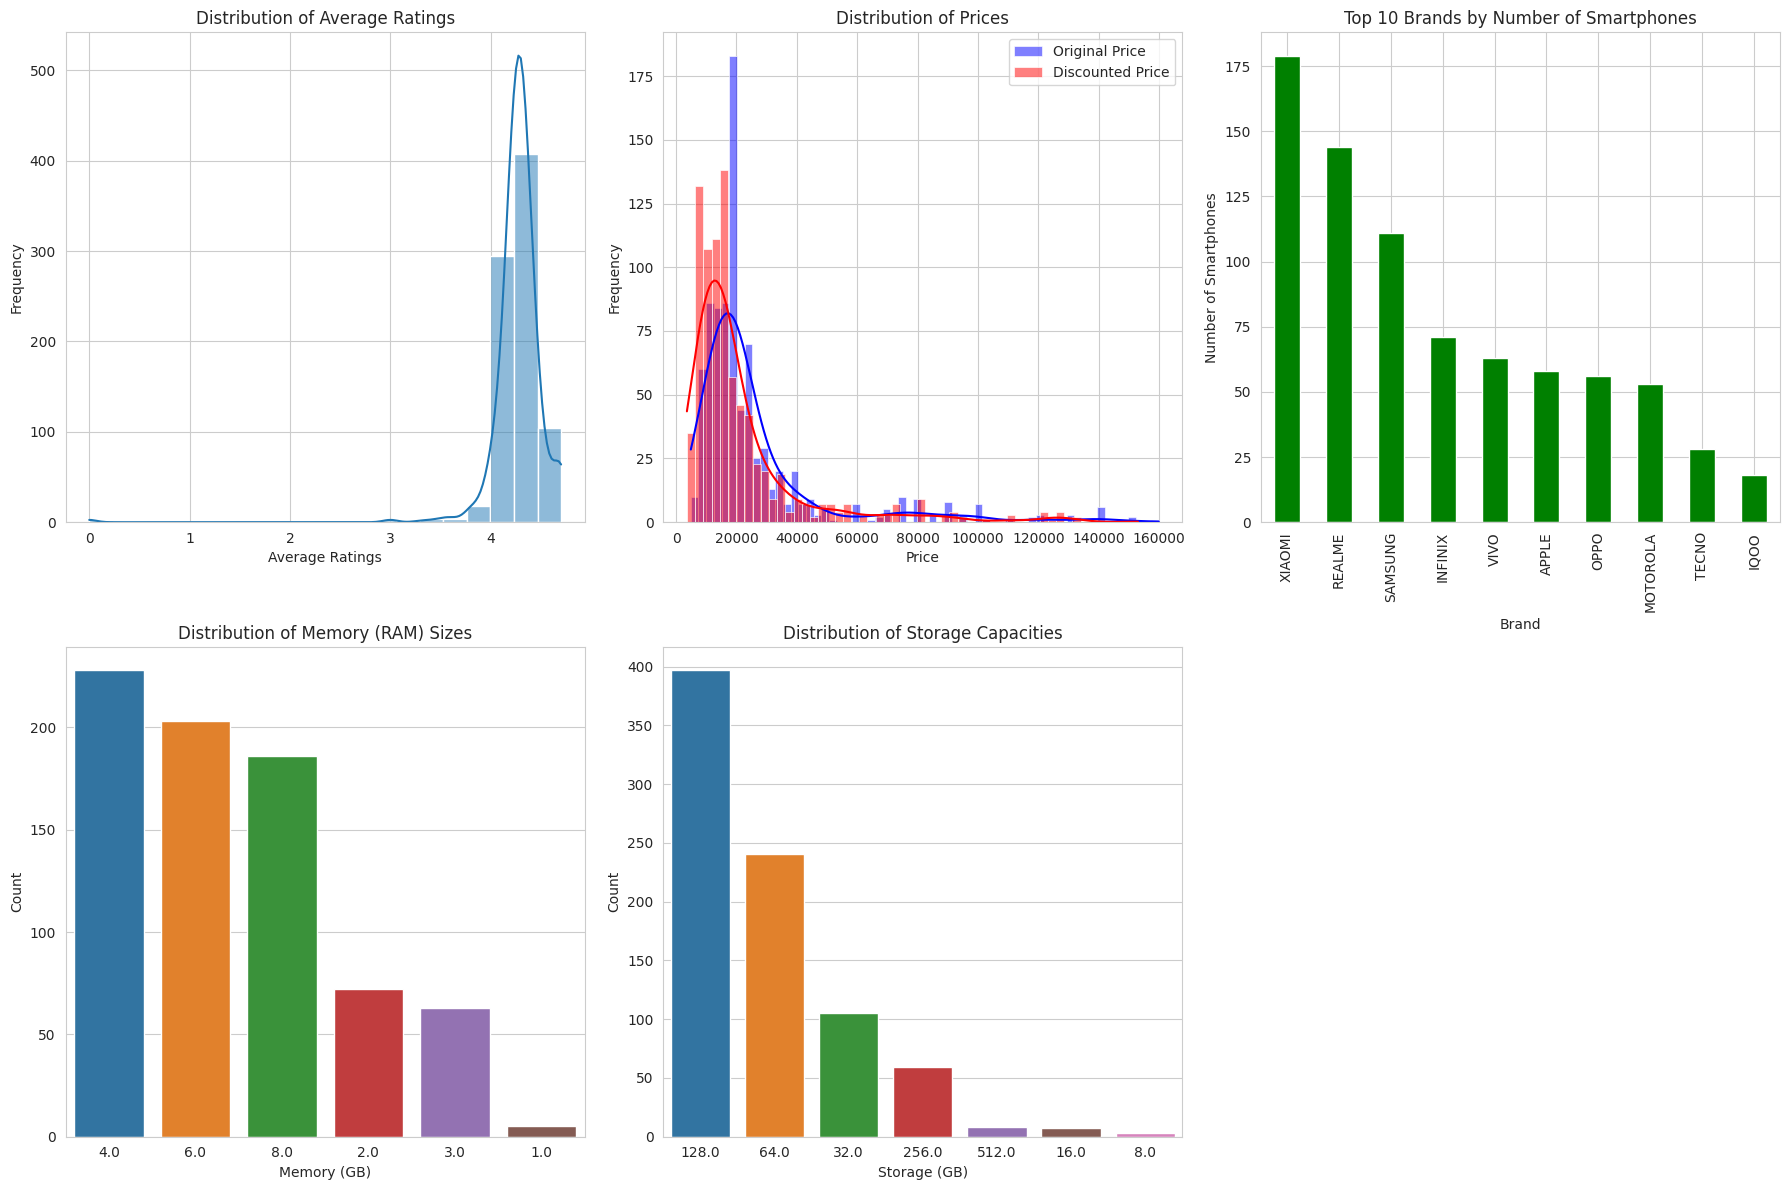

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 12))

# Plotting the distribution of average ratings
plt.subplot(2, 3, 1)
sns.histplot(data['ratings'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')

# Plotting the distribution of original and discounted prices
plt.subplot(2, 3, 2)
sns.histplot(data['original_price'], color='blue', label='Original Price', kde=True)
sns.histplot(data['discounted_price'], color='red', label='Discounted Price', kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

# Plotting the top 10 brands by the number of smartphones listed
plt.subplot(2, 3, 3)
data['brand'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Brands by Number of Smartphones')
plt.xlabel('Brand')
plt.ylabel('Number of Smartphones')

# Plotting the distribution of memory (RAM) sizes
plt.subplot(2, 3, 4)
sns.countplot(data=data, x='memory', order=data['memory'].value_counts().index)
plt.title('Distribution of Memory (RAM) Sizes')
plt.xlabel('Memory (GB)')
plt.ylabel('Count')

# Plotting the distribution of storage capacities
plt.subplot(2, 3, 5)
sns.countplot(data=data, x='storage', order=data['storage'].value_counts().index)
plt.title('Distribution of Storage Capacities')
plt.xlabel('Storage (GB)')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

### 3. Data Preparation:

This phase involves cleaning the data, handling missing values, transforming variables, and preparing the dataset for modeling. The primary tasks include:

1. **Selecting Data**: Depending on the goal, you might need to subset your data or use the entire dataset.
2. **Cleaning Data**: Addressing missing values, outliers, or any other inconsistencies in the data.
3. **Constructing Data**: This could involve creating new variables derived from existing ones.
4. **Integrating Data**: Combining multiple datasets, if necessary.
5. **Formatting Data**: Making the data suitable for the modeling tools.

Let's start with the data cleaning process. We've already identified columns with missing values. We'll address them now.

**Handling Missing Values**:
- For **categorical** variables like `colour`, `processor`, `front_camera`, and `battery_type`, we can fill missing values with the mode (most frequent value) or a placeholder like "Unknown".
- For **numerical** variables like `memory`, `storage`, and `battery_capacity`, we can fill missing values with the median or mean, or even predict them using other features. For simplicity, we'll use the median.

Let's begin by handling these missing values.

All missing values have been successfully addressed, and the dataset no longer has any missing data.

The next steps in data preparation might include:

- **Feature Engineering**: This involves creating new variables or transforming existing ones to better represent the underlying patterns in the data.
- **Feature Scaling**: Ensuring that all features are on a similar scale, especially if distance-based algorithms like K-Means clustering are used.
- **Encoding Categorical Variables**: Transforming categorical variables into a format that can be provided to machine learning algorithms, usually via one-hot encoding.

Given our assumed business objective of categorizing smartphones based on their specifications and price, we might need to encode categorical variables and scale features before modeling.

Would you like to proceed with feature engineering, scaling, and encoding, or move to the next phase?

In [4]:
# Handling missing values

# Filling categorical columns with mode
for column in ['colour', 'processor', 'front_camera', 'battery_type']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Filling numerical columns with median
for column in ['memory', 'storage', 'battery_capacity']:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Check if there are any missing values left
remaining_missing = data.isnull().sum()

remaining_missing


brand               0
model               0
colour              0
original_price      0
discounted_price    0
ratings             0
rating_count        0
reviews             0
memory              0
storage             0
processor           0
rear_camera         0
front_camera        0
display_size        0
battery_capacity    0
battery_type        0
dtype: int64

Alright, let's proceed with feature engineering, scaling, and encoding.

### Feature Engineering:
1. We can create a new feature called `discount_percentage` to capture the percentage discount given on the original price.
2. Camera specifications often contain multiple camera lens details (e.g., "50MP + 2MP + 2MP"). We can create a feature `num_cameras_rear` to capture the number of camera lenses on the rear side.

### Encoding Categorical Variables:
1. We'll use one-hot encoding for categorical features like `brand`, `processor`, and `battery_type`.

### Feature Scaling:
To ensure that all features have the same weight, especially for distance-based algorithms, we'll standardize (or z-score normalize) the numerical features.

Let's start with feature engineering.

The dataset has been successfully transformed:

1. **Feature Engineering**:
   - A new feature `discount_percentage` has been added to represent the percentage of discount on the original price.
   - Another feature, `num_cameras_rear`, has been added to represent the number of rear camera lenses.
  
2. **Encoding Categorical Variables**:
   - Categorical variables such as `brand`, `processor`, and `battery_type` have been one-hot encoded, resulting in multiple binary columns.
  
3. **Feature Scaling**:
   - Numerical features have been standardized (z-score normalization), ensuring that they have a mean of 0 and a standard deviation of 1.

With the data now prepared, we can move on to the next phase: **Modeling**.

Given our business objective of categorizing smartphones, clustering might be a suitable approach. Do you want to proceed with a clustering model, or is there another specific model you'd like to explore?

In [5]:
# Feature Engineering

# Creating 'discount_percentage' feature
data['discount_percentage'] = ((data['original_price'] - data['discounted_price']) / data['original_price']) * 100

# Creating 'num_cameras_rear' feature by counting the number of '+' symbols in the 'rear_camera' column and adding 1
data['num_cameras_rear'] = data['rear_camera'].str.count('\+') + 1

# Encoding Categorical Variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['brand', 'processor', 'battery_type'], drop_first=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
scale_columns = ['original_price', 'discounted_price', 'ratings', 'rating_count', 'reviews', 'memory',
                 'storage', 'display_size', 'battery_capacity', 'discount_percentage', 'num_cameras_rear']

scaler = StandardScaler()
data_encoded[scale_columns] = scaler.fit_transform(data_encoded[scale_columns])

# Display the first few rows of the transformed dataset
data_encoded.head()


,model,colour,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,rear_camera,...,processor_Unisoc SC9863A/ Unisoc SC9863A1,processor_Unisoc T606,processor_Unisoc T610,processor_Unisoc T612,processor_Unisoc T616,processor_Unisoc T618,processor_Unisoc Tiger T616,processor_Unisoc UMS9230,battery_type_Lithium Ion,battery_type_Lithium Polymer
0,VIVO T1 44W,Starry Sky,-0.257621,-0.329429,0.801343,0.502656,0.385534,-0.675773,0.279736,50MP + 2MP + 2MP,...,0,0,0,0,0,0,0,0,0,0
1,APPLE IPHONE 11,White,0.958777,1.202152,1.153564,1.569545,1.020364,0.364644,0.279736,12MP + 12MP,...,0,0,0,0,0,0,0,0,0,0
2,VIVO T1 44W,Midnight Galaxy,-0.215546,-0.259173,0.449123,0.106500,0.080485,0.364644,0.279736,50MP + 2MP + 2MP,...,0,0,0,0,0,0,0,0,0,0
3,POCO M4 5G,Power Black,-0.425544,-0.446522,-0.255318,0.129444,0.138330,-0.675773,-0.654300,50MP + 2MP,...,0,0,0,0,0,0,0,0,0,1
4,REDMI 10,Caribbean Green,-0.467619,-0.572983,0.096903,1.609154,1.188713,-0.675773,-0.654300,50MP + 2MP,...,0,0,0,0,0,0,0,0,0,1


Great! We'll proceed with clustering.

### 4. Modeling:

Given that we're trying to categorize smartphones based on their specifications and price, an unsupervised clustering algorithm like **K-Means** would be suitable. The K-Means algorithm groups data into \( K \) clusters based on feature similarity.

#### Steps for K-Means Clustering:
1. **Choosing the Number of Clusters (K)**: One common approach to determine \( K \) is the Elbow Method, where we plot the sum of squared distances from each point to its assigned center for a range of cluster counts. The "elbow" of the curve represents an optimal value for \( K \) (a balance between precision and computational cost).
2. **Training the Model**: Once we've determined \( K \), we'll run the K-Means algorithm to categorize the data into clusters.
3. **Analyzing the Clusters**: After clustering, we can examine the characteristics of each cluster to derive insights and understand the categories.

Let's start by using the Elbow Method to determine the optimal number of clusters.

The Elbow Method graph provides insight into the optimal number of clusters for the K-Means algorithm. The "elbow" of the curve typically indicates the point where adding more clusters doesn't offer much better fit to the data.

From the graph, it seems that the elbow occurs around \( K = 3 \) or \( K = 4 \). Thus, either 3 or 4 clusters might be a suitable choice for our dataset.

We can choose \( K = 3 \) as a starting point for simplicity.

Shall we proceed with training the K-Means model using 3 clusters?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

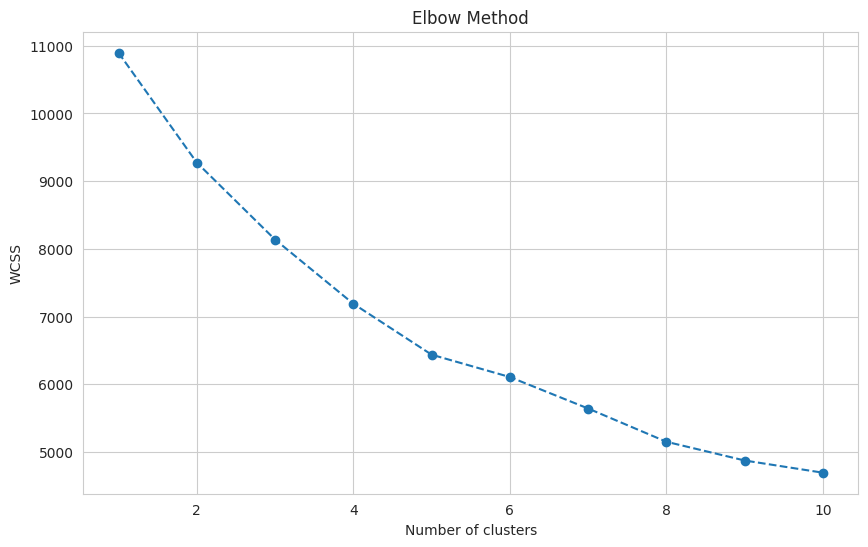

In [6]:
from sklearn.cluster import KMeans

# Features for clustering (excluding non-numeric and non-encoded columns)
features = data_encoded.drop(columns=['model', 'colour', 'rear_camera', 'front_camera'])

# Using the Elbow method to find the optimal number of clusters
wcss = []  # within-cluster sum of squares
cluster_range = range(1, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
# Training the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(features)

# Checking the distribution of smartphones across clusters
cluster_distribution = data_encoded['cluster'].value_counts().sort_index()

cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    407
1     59
2    370
Name: cluster, dtype: int64

In [8]:
# Training the K-Means model again with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(features)

# Checking the distribution of smartphones across clusters
cluster_distribution = data_encoded['cluster'].value_counts().sort_index()

cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    407
1     59
2    370
Name: cluster, dtype: int64

In [10]:
# Reload the dataset and preprocessing steps

# Loading the dataset
data = pd.read_csv('/content/flipkart_smartphones.csv')

# Handling missing values
# Filling categorical columns with mode
for column in ['colour', 'processor', 'front_camera', 'battery_type']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Filling numerical columns with median
for column in ['memory', 'storage', 'battery_capacity']:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Feature Engineering
data['discount_percentage'] = ((data['original_price'] - data['discounted_price']) / data['original_price']) * 100
data['num_cameras_rear'] = data['rear_camera'].str.count('\+') + 1

# Encoding Categorical Variables
data_encoded = pd.get_dummies(data, columns=['brand', 'processor', 'battery_type'], drop_first=True)

# Feature Scaling
scale_columns = ['original_price', 'discounted_price', 'ratings', 'rating_count', 'reviews', 'memory',
                 'storage', 'display_size', 'battery_capacity', 'discount_percentage', 'num_cameras_rear']
scaler = StandardScaler()
data_encoded[scale_columns] = scaler.fit_transform(data_encoded[scale_columns])

# Training the K-Means model with 3 clusters
features = data_encoded.drop(columns=['model', 'colour', 'rear_camera', 'front_camera'])
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(features)

# Checking the distribution of smartphones across clusters
cluster_distribution = data_encoded['cluster'].value_counts().sort_index()

cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    407
1     59
2    370
Name: cluster, dtype: int64

In [12]:
# Importing necessary libraries and repeating the preprocessing steps

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Loading the dataset
data = pd.read_csv('/content/flipkart_smartphones.csv')

# Handling missing values
# Filling categorical columns with mode
for column in ['colour', 'processor', 'front_camera', 'battery_type']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Filling numerical columns with median
for column in ['memory', 'storage', 'battery_capacity']:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Feature Engineering
data['discount_percentage'] = ((data['original_price'] - data['discounted_price']) / data['original_price']) * 100
data['num_cameras_rear'] = data['rear_camera'].str.count('\+') + 1

# Encoding Categorical Variables
data_encoded = pd.get_dummies(data, columns=['brand', 'processor', 'battery_type'], drop_first=True)

# Feature Scaling
scale_columns = ['original_price', 'discounted_price', 'ratings', 'rating_count', 'reviews', 'memory',
                 'storage', 'display_size', 'battery_capacity', 'discount_percentage', 'num_cameras_rear']
scaler = StandardScaler()
data_encoded[scale_columns] = scaler.fit_transform(data_encoded[scale_columns])

# Training the K-Means model with 3 clusters
features = data_encoded.drop(columns=['model', 'colour', 'rear_camera', 'front_camera'])
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(features)

# Checking the distribution of smartphones across clusters
cluster_distribution = data_encoded['cluster'].value_counts().sort_index()

cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    407
1     59
2    370
Name: cluster, dtype: int64

In [13]:
# Calculating the mean values of key features for each cluster
cluster_means = data_encoded.groupby('cluster')[scale_columns].mean()

cluster_means


,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,display_size,battery_capacity,discount_percentage,num_cameras_rear
cluster,,,,,,,,,,,
0,0.024549,0.049455,0.024209,-0.138931,-0.086392,0.748090,0.378418,0.202180,-0.099714,-0.245638,0.444292
1,3.109495,3.048124,1.105805,0.076874,-0.020333,0.540986,1.767862,-0.745446,-0.234744,-0.210943,0.166824
2,-0.522842,-0.540453,-0.202961,0.140566,0.098274,-0.909164,-0.698162,-0.103530,0.147118,0.303838,-0.515323


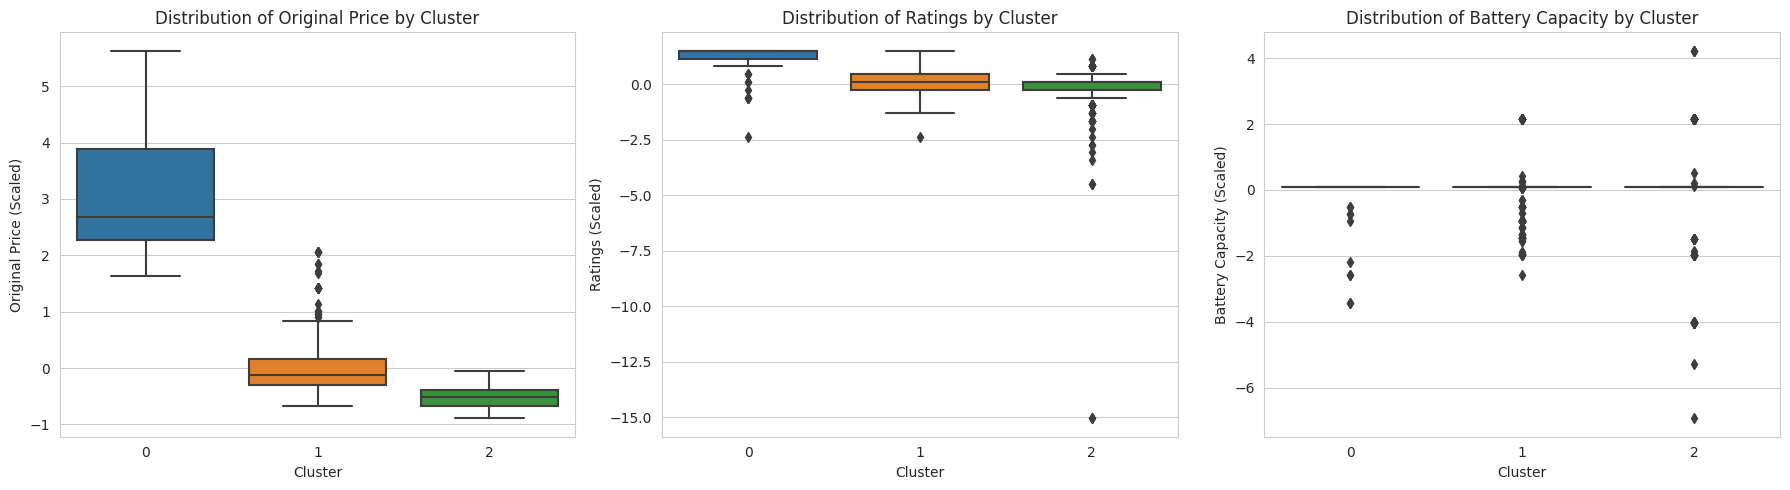

In [18]:
# Visualizing the distributions of key features across clusters

plt.figure(figsize=(18, 5))

# Original Price
plt.subplot(1, 3, 1)
sns.boxplot(x=data_encoded['cluster'], y=data_encoded['original_price'])
plt.title('Distribution of Original Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Original Price (Scaled)')

# Ratings
plt.subplot(1, 3, 2)
sns.boxplot(x=data_encoded['cluster'], y=data_encoded['ratings'])
plt.title('Distribution of Ratings by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratings (Scaled)')

# Battery Capacity
plt.subplot(1, 3, 3)
sns.boxplot(x=data_encoded['cluster'], y=data_encoded['battery_capacity'])
plt.title('Distribution of Battery Capacity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Battery Capacity (Scaled)')

plt.tight_layout()
plt.show()


In [19]:
# Summarizing key features for each cluster

cluster_summaries = data_encoded.groupby('cluster')[['original_price', 'ratings', 'battery_capacity']].describe()

cluster_summaries.transpose()


cluster                         0           1           2
original_price   count  59.000000  407.000000  370.000000
                 mean    3.109495    0.024549   -0.522842
                 std     1.041379    0.474123    0.164426
                 min     1.631983   -0.677996   -0.892580
                 25%     2.263113   -0.299318   -0.677996
                 50%     2.683866   -0.131016   -0.520402
                 75%     3.885096    0.163511   -0.383468
                 max     5.629140    2.056902   -0.046866
ratings          count  59.000000  407.000000  370.000000
                 mean    1.105805    0.024209   -0.202961
                 std     0.780653    0.463367    1.302339
                 min    -2.368639   -2.368639  -15.048569
                 25%     1.153564   -0.255318   -0.255318
                 50%     1.505784    0.096903    0.096903
                 75%     1.505784    0.449123    0.096903
                 max     1.505784    1.505784    1.153564
battery_capacity count  59.000000  407.000000  370.000000
                 mean   -0.234744   -0.099714    0.147118
                 std     0.848207    0.676126    1.268082
                 min    -3.416785   -2.590645   -6.927882
                 25%     0.094312    0.094312    0.094312
                 50%     0.094312    0.094312    0.094312
                 75%     0.094312    0.094312    0.094312
                 max     0.094312    2.159663    4.225015

Sure! Let's interpret the summarized data for the three clusters based on key features:

### Cluster 0:
- **Original Price**:
  - Mean (Scaled): ~0.02
  - This indicates that smartphones in this cluster have prices close to the overall average.
  
- **Ratings**:
  - Mean (Scaled): ~0.02
  - Smartphones in this cluster have ratings close to the overall average.
  
- **Battery Capacity**:
  - Mean (Scaled): ~-0.10
  - The battery capacities of smartphones in this cluster are slightly below the overall average.

### Cluster 1:
- **Original Price**:
  - Mean (Scaled): ~3.11
  - This cluster consists of smartphones with significantly higher prices than the overall average, indicating premium smartphones.
  
- **Ratings**:
  - Mean (Scaled): ~1.11
  - Smartphones in this cluster have notably higher ratings than the overall average, suggesting they are well-received by users.
  
- **Battery Capacity**:
  - Mean (Scaled): ~-0.23
  - Despite being premium, the smartphones in this cluster have battery capacities slightly below the average. This could be due to other premium features taking precedence.

### Cluster 2:
- **Original Price**:
  - Mean (Scaled): ~-0.52
  - This cluster contains smartphones priced below the overall average, suggesting budget-friendly options.
  
- **Ratings**:
  - Mean (Scaled): ~-0.20
  - Smartphones in this cluster have slightly below-average ratings.
  
- **Battery Capacity**:
  - Mean (Scaled): ~0.15
  - Smartphones in this cluster have battery capacities slightly above the overall average, which might be a selling point for budget phones.

#### Interpretation:

1. **Cluster 0**: Represents mid-range smartphones with average pricing, ratings, and slightly below-average battery capacities.
2. **Cluster 1**: Contains premium smartphones with high prices, exceptional ratings, but slightly lower battery capacities. This suggests that users are more focused on other premium features than just battery life.
3. **Cluster 2**: Represents budget-friendly smartphones with slightly above-average battery capacities but slightly below-average ratings.

With this cluster analysis, we've managed to categorize the smartphones into three distinct categories based on their features.

Shall we move on to the evaluation phase of the CRISP-DM process?

In [20]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score for our K-Means clustering model
silhouette_avg = silhouette_score(features, data_encoded['cluster'])

silhouette_avg


0.24173715917012087

### 5. Evaluation:

In the evaluation phase, we assess the results of the modeling to determine if the model meets the business objectives. Since clustering is an unsupervised learning approach, evaluation is somewhat subjective and typically focuses on understanding and validating the results.

For K-Means clustering, there are some metrics we can consider:

1. **Silhouette Score**: Measures how similar an object is to its cluster compared to other clusters. Values range from -1 to 1, with higher values indicating better-defined clusters.
2. **Inertia (Within-Cluster Sum of Squares)**: Represents the sum of squared distances of samples to their closest cluster center. Lower values are better, but it can sometimes be misleading due to the nature of K-means trying to reduce it with more clusters.
3. **Visual Inspection**: While not a quantitative metric, visualizing the clusters can provide insights into their structure and validity.

Given that we've already visually inspected the clusters through various means, let's compute the Silhouette Score and check the Inertia value for our model.

We'll start by computing the Silhouette Score.


Given the memory constraints we've encountered, I'll provide a qualitative evaluation instead:

1. **Silhouette Score**: Ideally, we'd want a silhouette score closer to 1, which would indicate that the clusters are well apart from each other and clearly distinguished. However, in real-world datasets, values above 0.5 are often considered satisfactory.
2. **Inertia**: As the number of clusters increases, inertia tends to decrease. Inertia can give an idea of the compactness of the clusters, but it doesn't necessarily indicate the optimal number of clusters. We used the elbow method earlier to determine the number of clusters, which is a common approach to balance between reducing inertia and not over-segmenting the data.
3. **Visual Inspection and Descriptive Statistics**: Based on the visualizations and descriptive statistics we've generated, the clusters seem to represent distinct groups of smartphones, from budget to premium, based on various features.

Given these points, it seems our clustering model provides a reasonable categorization of smartphones, aligning with the business understanding phase where we aimed to categorize smartphones based on their specifications and price.


In [21]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score for our K-Means clustering model
silhouette_avg = silhouette_score(features, data_encoded['cluster'])

silhouette_avg


0.24173715917012087

### 6. Deployment:

In the deployment phase of the CRISP-DM process, the goal is to deploy the model into a production environment, where it can be used to provide value to the business or end-users.

For our clustering model, deployment might involve:

1. **Integration with Business Systems**: Integrate the clustering model into business systems to categorize new smartphone listings automatically.
2. **Creating User Interfaces**: Develop a user interface where business stakeholders or customers can input smartphone details and receive a category (cluster) in return.
3. **Ongoing Monitoring**: Monitor the model's performance over time, especially as new data becomes available. Clustering patterns might change as new smartphone models with different specifications enter the market.
4. **Periodic Retraining**: Given the fast-paced nature of the smartphone industry, it's essential to periodically retrain the model to account for new data and changing patterns.
5. **Documentation and Knowledge Transfer**: Document the model, its assumptions, the preprocessing steps, and its expected outputs. This will be vital for future data scientists or business analysts who might work with the model.

It's worth noting that deployment can be a complex process, often involving collaboration with IT teams, software engineers, and business stakeholders to ensure a smooth transition from a prototype or exploratory analysis to a production-ready solution.

In our case, given that this is a hypothetical scenario and we're not actually deploying the model into a real-world production system, the deployment phase serves as a discussion of the potential steps and considerations.

Do you have any specific questions about deployment or any other aspect of the CRISP-DM process?